In [27]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from bs4 import BeautifulSoup
import requests

def analyze_sentiment_long(text):
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    model = BertForSequenceClassification.from_pretrained('bert-base-uncased')

    # Tokenize the text and handle long sequences
    inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=512)
    
    # Forward pass through the model
    outputs = model(**inputs)
    
    # Get the predicted label and confidence score
    predicted_label = torch.argmax(outputs.logits).item()
    confidence_score = torch.nn.functional.softmax(outputs.logits, dim=1)[0][predicted_label].item()
    
    return {'label': predicted_label, 'score': confidence_score}

# Function to get text from a webpage
def get_text_from_webpage(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    paragraphs = soup.find_all('p')
    text = ' '.join([paragraph.text for paragraph in paragraphs])
    return text

# Map sentiment labels for better readability
def map_sentiment_label(label):
    if label == 0:
        return 'Negative'
    elif label == 1:
        return 'Neutral'
    elif label == 2:
        return 'Positive'
    else:
        return 'Unknown'

# Example usage
if __name__ == "__main__":
    # Example: Analyzing sentiment of a text from a webpage
    url = "https://indianexpress.com/article/political-pulse/gehlot-schemes-or-modi-appeal-down-to-the-wire-as-rajasthan-votes-today-9041301/"
    text_from_webpage = get_text_from_webpage(url)
    sentiment_result_long = analyze_sentiment_long(text_from_webpage)

    # Map sentiment label for better readability
    mapped_label_long = map_sentiment_label(sentiment_result_long['label'])

    print(f"Sentiment for {url}: {mapped_label_long} (confidence: {sentiment_result_long['score']:.2f})")


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Sentiment for https://indianexpress.com/article/political-pulse/gehlot-schemes-or-modi-appeal-down-to-the-wire-as-rajasthan-votes-today-9041301/: Neutral (confidence: 0.55)


In [38]:
def analyze_sentiment_batch(urls):
    results = []
    for url in urls:
        text_from_webpage = get_text_from_webpage(url)
        sentiment_result = analyze_sentiment_long(text_from_webpage)
        results.append({
            'url': url,
            'sentiment_label': map_sentiment_label(sentiment_result['label']),
            'confidence_score': sentiment_result['score']
        })
    return results

# Example usage for batch processing
if __name__ == "__main__":
    urls_to_process = ["https://indianexpress.com/article/technology/artificial-intelligence/metadata-fact-finding-role-explained-9041789/",
                       "https://indianexpress.com/article/sports/cricket/the-hurting-indian-team-needs-its-3-a-m-captain-rohit-sharma-and-coach-rahul-dravid-to-continue-9041366/", 
                       "https://indianexpress.com/article/education/iit-madras-to-counsel-students-parents-mental-health-btech-jee-main-2024-9030478/"]
    batch_results = analyze_sentiment_batch(urls_to_process)
    for result in batch_results:
        print(f"Sentiment for {result['url']}: {result['sentiment_label']} (confidence: {result['confidence_score']:.2f})")


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Sentiment for https://indianexpress.com/article/technology/artificial-intelligence/metadata-fact-finding-role-explained-9041789/: Neutral (confidence: 0.54)
Sentiment for https://indianexpress.com/article/sports/cricket/the-hurting-indian-team-needs-its-3-a-m-captain-rohit-sharma-and-coach-rahul-dravid-to-continue-9041366/: Neutral (confidence: 0.58)
Sentiment for https://indianexpress.com/article/education/iit-madras-to-counsel-students-parents-mental-health-btech-jee-main-2024-9030478/: Neutral (confidence: 0.62)


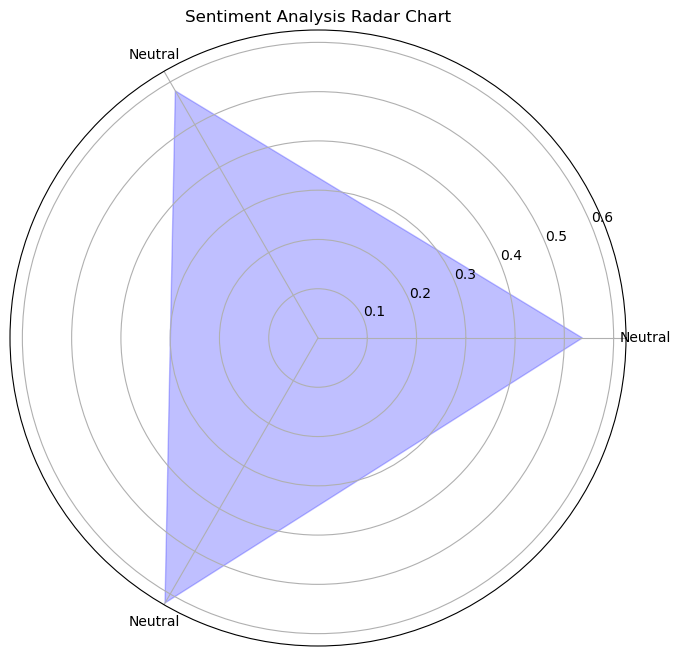

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# Example for creating a radar chart
labels = [result['sentiment_label'] for result in batch_results]
scores = [result['confidence_score'] for result in batch_results]

# Number of categories
num_categories = len(labels)

# Calculate angle for each category
theta = np.linspace(0, 2 * np.pi, num_categories, endpoint=False).tolist()
theta += theta[:1]  # Close the plot

# Ensure that the lengths match by repeating the first score
scores += scores[:1]

# Plot the radar chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.fill(theta, scores, color='blue', alpha=0.25)

# Set labels for each category
ax.set_xticks(theta[:-1])
ax.set_xticklabels(labels)

# Display the radar chart
plt.title('Sentiment Analysis Radar Chart')
plt.show()


In [62]:
%matplotlib qt
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML
from matplotlib.animation import FuncAnimation

# Example for creating a radar chart
labels = [result['sentiment_label'] for result in batch_results]
scores = [result['confidence_score'] for result in batch_results]

# Number of categories
num_categories = len(labels)

# Calculate angle for each category
theta = np.linspace(0, 2 * np.pi, num_categories, endpoint=False).tolist()
theta += theta[:1]  # Close the plot

# Ensure that the lengths match by repeating the first score
scores += scores[:1]

# Create a figure and axis for the radar chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Initial plot with empty data
line, = ax.plot(theta, np.zeros_like(theta), color='blue', alpha=0.25)

# Set labels for each category
ax.set_xticks(theta[:-1])
ax.set_xticklabels(labels)

# Function to update the plot for each frame of the animation
def update(frame):
    line.set_ydata(scores[:frame + 1] + [0] * (num_categories - frame - 1))
    return line,

# Create the animation
ani = FuncAnimation(fig, update, frames=num_categories, interval=500, blit=True)

# Display the radar chart with animation in a separate window
plt.title('Sentiment Analysis Radar Chart')
plt.show()
